# Metrics in Scikit-learn
Scikit-learn provides a wide range of metrics to evaluate the performance of machine learning models. These metrics are categorized based on the type of task: classification, regression, or clustering.

## **Classification Metrics**
Classification metrics are used to evaluate models that predict discrete labels (e.g., spam detection, image classification).

| **Metric**               | **Description**                                                                 |**Interpretation**|
|--------------------------|---------------------------------------------------------------------------------|---|
| `accuracy_score`         | Measures the ratio of correctly predicted labels to the total number of labels. |Good for balanced datasets but misleading for imbalanced data|
| `precision_score`        | Measures the proportion of true positives out of all predicted positives.       |Higher precision means fewer false positives|
| `recall_score`           | Measures the proportion of true positives out of all actual positives.          |Higher recall means fewer false negatives|
| `f1_score`               | Harmonic mean of precision and recall. Balances precision and recall.           |F1 = 1 (best), F1 = 0 (worst)|
| `confusion_matrix`       | Provides a matrix showing true positives, true negatives, false positives, and false negatives. | |
| `roc_auc_score`          | Measures the area under the ROC curve for binary classification.                |<table><tbody><tr><td>AUC = 1.0</td><td>Perfect classifier</td></tr><tr><td>AUC = 0.5</td><td>Random guessing</td></tr><tr><td>AUC < 0.5</td><td>Worse than random</td></tr></tbody></table>|
| `roc_curve`           | Computes the true positive rate and false positive rate at various thresholds. |<table><tbody><tr><td>True Positive Rate (TPR)</td><td>Recall</td></tr><tr><td>False Positive Rate (FPR)</td><td>1 - Specificity</td></tr></tbody></table>|
| `classification_report`  | Provides a detailed report of precision, recall, F1-score, and support for each class. |<table><thead><tr><td>Metric</td><td>Explanation</td></tr></thead><tbody><tr><td>Support</td><td>The number of actual occurrences of the class. More support = More data for that class</td></tr><tr><td>Accuracy</td><td>accuracy of precision, recall, F1-score across all classes</td></tr><tr><td>Macro Avg</td><td>Unweighted average of precision, recall, F1-score across all classes</td></tr><tr><td>Weighted Avg</td><td>Takes class imbalance into account (weighted by support)</td></tr></tbody></table>|

Accuracy: 0.71
Precision: 0.75
Recall: 0.75
F1 Score: 0.75
Confusion Matrix:
[[2 1]
 [1 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.75      0.75      0.75         4

    accuracy                           0.71         7
   macro avg       0.71      0.71      0.71         7
weighted avg       0.71      0.71      0.71         7

ROC AUC Score: 0.71


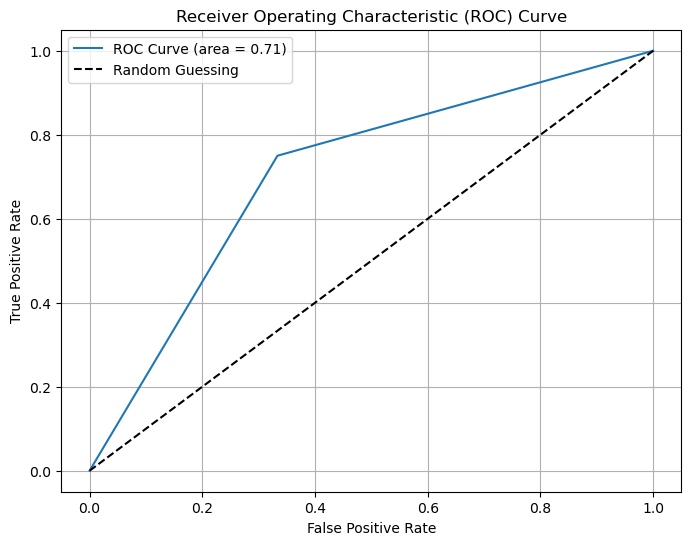

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_auc_score,roc_curve

# Example true and predicted labels
y_true = [0, 1, 1, 0, 1, 1, 0]
y_pred = [0, 1, 0, 0, 1, 1, 1]

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Example ROC curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

## **Regression Metrics**
Regression metrics are used to evaluate models that predict continuous values (e.g., house prices, stock prices).

| **Metric**               | **Description**                                                                 |**Interpretation**|
|--------------------------|---------------------------------------------------------------------------------|---|
| `mean_absolute_error`    | Measures the average absolute difference between predicted and actual values.   |Lower is better (closer to 0)|
| `mean_squared_error`     | Measures the average squared difference between predicted and actual values.    |Lower is better|
| `root_mean_squared_error`| Square root of the mean squared error.                                          |Lower is better|
| `r2_score`               | Measures the proportion of variance explained by the model (coefficient of determination). |Closer to 1 is better|


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Example true and predicted values
y_true = [3.0, -0.5, 2.0, 7.0]
y_pred = [2.5, 0.0, 2.0, 8.0]

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_true, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

## **Clustering Metrics**
Clustering metrics are used to evaluate unsupervised learning models (e.g., K-Means, DBSCAN).

| **Metric**               | **Description**                                                                 |**Interpretation**|
|--------------------------|---------------------------------------------------------------------------------|---|
| `adjusted_rand_score`    | Measures the similarity between two clusterings(actual and predicted), adjusted for chance.           |Range: [−1,1]<br>1 → Perfect match with ground truth.<br>0 → Random clustering.<br>Negative values → Worse than random clustering.<br>*used in supervised clustering|
| `silhouette_score`       | Measures how similar an object is to its own cluster compared to other clusters.|Range: [−1,1]<br>1 → Clusters are well-separated and compact.<br>0 → Overlapping clusters.<br>Negative → Incorrect clustering (samples are closer to other clusters than their own).<br>*Sensitive to the choice of distance metric.|
| `calinski_harabasz_score`| Measures the ratio of inter-cluster variance to intra-cluster variance.  |Higher CH score → Better clustering.<br>No fixed range, but higher is better.<br>Sensitive to cluster count → Higher values favor more clusters.<br>*Good for comparing different clustering models, but may not work well when clusters have different densities.|
| `davies_bouldin_score`   | Measures the average similarity ratio of each cluster with the cluster most similar to it. |Range: [0,∞)<br>Lower values are better → Less similarity between clusters.<br>Higher values → Poor clustering (clusters are overlapping).<br>*Useful when ground truth labels are unavailable, but may favor compact clusters even if they are incorrect.|

In [1]:
from sklearn.metrics import adjusted_rand_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y_true = make_blobs(n_samples=100, centers=3, random_state=42)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

# Calculate metrics
ari = adjusted_rand_score(y_true, y_pred)
silhouette = silhouette_score(X, y_pred)
ch = calinski_harabasz_score(X, y_pred)
db = davies_bouldin_score(X, y_pred)

print(f"Adjusted Rand Index: {ari:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Calinski-Harabasz Index: {ch:.2f}")
print(f"Davies-Bouldin Index: {db:.2f}")

Adjusted Rand Index: 1.00
Silhouette Score: 0.85
Calinski-Harabasz Index: 1778.09
Davies-Bouldin Index: 0.21


c:\Users\Yee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## **Custom Metrics**
Define custom metrics using Python functions. For example:

In [ ]:
from sklearn.metrics import make_scorer

def custom_metric(y_true, y_pred):
    return sum(abs(y_true - y_pred)) / len(y_true)

custom_scorer = make_scorer(custom_metric, greater_is_better=False)


## **Choosing the Right Metric**
**Classification**:
- Use `accuracy_score` for balanced datasets.
- Use `precision`, `recall`, or `f1_score` for imbalanced datasets.
- Use `roc_auc_score` for binary classification with probabilistic outputs.

**Regression**:
- Use `mean_squared_error` or `mean_absolute_error` for continuous predictions.
- Use `r2_score` to measure how well the model explains the variance in the data.

**Clustering**:
- Use `silhouette_score` for evaluating the quality of clusters.
- Use `adjusted_rand_score` to compare clustering results with ground truth.
